Only Kayode should make changes to this file. 

In [850]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import seaborn as sns 

from proj_mod import drop_extreme

import sys 
sys.path.append("../../")

all_data=pd.read_csv("../../data/processed/all_data_inf_adj_collection.csv", parse_dates=["Date"])
#all_data = all_data.sort_values(by="Date")

all_data = all_data.dropna()

all_data=drop_extreme.drop_by_sort(df_in=all_data, fl_low=0.001, fl_high=0.999)
all_data=all_data.drop("Unnamed: 0", axis=1)

all_data=all_data.reindex(columns=['Date', 
       'tech_index_20days_prior_pro_change_inf_adj',
       'fed_dff_daily', 
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'])







In [851]:
all_data_extended = all_data.copy(deep=True)

all_data_test = all_data.copy(deep=True)

In [852]:
print(all_data_test["tech_index_20days_prior_pro_change_inf_adj"][1:40])

25   -1.303421
26   -0.191118
27    0.550136
28    1.961968
29    0.997270
30   -0.075260
31    0.045748
32    0.143476
33    0.377229
34    0.220839
35    0.750993
36    3.752072
37    4.210635
38    5.678238
39    6.434802
40    3.765215
41    4.535858
42    7.359361
43    6.671707
44    6.431358
45    5.396211
46    3.657926
47    3.446034
48    0.833125
49   -0.002085
50    0.359407
51    1.393343
52    0.736600
53    2.129444
54    1.222751
55    1.092697
56    2.128431
57   -0.523745
58   -0.929549
59   -1.096957
60   -0.247473
61    2.136270
62    1.128480
63    0.561351
Name: tech_index_20days_prior_pro_change_inf_adj, dtype: float64


In [853]:
all_data_extended_train = all_data_extended[all_data_extended["Date"]<"2024-01-01"]

print(all_data_test)
all_data_extended_test = all_data_test[all_data_extended["Date"]>="2024-01-01"]


features = all_data_extended_train.drop(columns=["Date", "tech_index_20days_prior_pro_change_inf_adj"]).values
target = all_data_extended_train["tech_index_20days_prior_pro_change_inf_adj"].values.reshape(-1, 1)

features_test = all_data_extended_test.drop(columns=["Date", "tech_index_20days_prior_pro_change_inf_adj"]).values
target_test = all_data_extended_test["tech_index_20days_prior_pro_change_inf_adj"].values.reshape(-1, 1)

all_data_extended_test

           Date  tech_index_20days_prior_pro_change_inf_adj  fed_dff_daily  \
24   2014-02-06                                   -3.002946           0.07   
25   2014-02-07                                   -1.303421           0.06   
26   2014-02-10                                   -0.191118           0.07   
27   2014-02-11                                    0.550136           0.06   
28   2014-02-12                                    1.961968           0.07   
...         ...                                         ...            ...   
2559 2024-10-18                                    4.000958           4.83   
2560 2024-10-21                                    4.581444           4.83   
2561 2024-10-22                                    4.967392           4.83   
2562 2024-10-23                                    2.510277           4.83   
2563 2024-10-24                                    2.186840           4.83   

      ppi314_monthly_pro_change_inf_adj  ppi332_monthly_pro_cha

,Date,tech_index_20days_prior_pro_change_inf_adj,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,ppi516_monthly_pro_change_inf_adj,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj
2358,2024-01-02,0.884517,5.33,0.571401,0.139925,0.291740,0.752648,-0.313551,-0.179168,0.324923,-6.485727,0.084486,-0.944778,-0.229569,-0.014800,0.241413,-7.158134,3.965365,5.328042,-7.643154
2359,2024-01-03,0.063899,5.33,0.571401,0.139925,0.291740,0.752648,-0.313551,-0.179168,0.324923,-6.485727,0.084486,-0.944778,-0.229569,-2.009630,-2.773980,-10.927271,4.534683,4.382528,-2.363525
2360,2024-01-04,0.748180,5.33,0.571401,0.139925,0.291740,0.752648,-0.313551,-0.179168,0.324923,-6.485727,0.084486,-0.944778,-0.229569,-0.251713,-0.161927,-7.410073,2.140889,1.455540,-1.844034
2361,2024-01-05,0.190783,5.33,0.571401,0.139925,0.291740,0.752648,-0.313551,-0.179168,0.324923,-6.485727,0.084486,-0.944778,-0.229569,0.026534,0.117576,-5.529701,4.810149,4.410840,1.281990
2362,2024-01-08,3.360916,5.33,0.571401,0.139925,0.291740,0.752648,-0.313551,-0.179168,0.324923,-6.485727,0.084486,-0.944778,-0.229569,1.921991,-1.241149,-4.310275,5.876650,4.432567,1.271725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,2024-10-18,4.000958,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,0.913610,4.784994,6.128419,0.072758,3.049522,-3.582055
2560,2024-10-21,4.581444,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,0.585822,3.861512,8.559245,887.434614,2.732575,-1.465553
2561,2024-10-22,4.967392,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,0.878336,4.399323,13.121057,941.937692,7.387287,2.941391
2562,2024-10-23,2.510277,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.591141,2.298359,4.658452,1.985836,3.336480,-0.777700


In [854]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(features)
X_scaled_test = feature_scaler.fit_transform(features_test)

# Normalize target (optional but helps)
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(target.reshape(-1, 1))
y_scaled_test = target_scaler.fit_transform(target_test.reshape(-1, 1))

In [855]:
def create_sequences(X, y, window_size=30):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, window_size=30)
print(X_seq.shape)  # should be (7270, 30, 20)
print(y_seq.shape)  # should be (7270, 1)


(2260, 30, 18)
(2260, 1)


In [856]:
import numpy as np

def create_lagged_features(X, y, lags=5):
    """
    Create lagged features for time series data and align the target.
    
    Parameters:
      X (np.array): Original input array with shape (num_samples, num_features)
      y (np.array): Original target array with shape (num_samples,) or (num_samples,1)
      lags (int): Number of past days to include.
      
    Returns:
      X_lagged: Array of shape (num_samples - lags, lags * num_features) (flattened)
      y_lagged: Array of shape (num_samples - lags,)
    """
    X_lagged = []
    y_lagged = []
    for i in range(lags, len(X)):
        # For each day i, take the previous `lags` days and flatten them
        lagged_sample = X[i-lags:i].flatten()
        X_lagged.append(lagged_sample)
        # The target for the sample is the value for day i
        y_lagged.append(y[i])
        
    return np.array(X_lagged), np.array(y_lagged)


In [857]:
lags = 5
X_lagged, y_lagged = create_lagged_features(X_scaled, y_scaled, lags=lags)
#print("X_lagged shape:", X_lagged.shape)  # Should be (N - 5, lags * num_features)
#print("y_lagged shape:", y_lagged.shape)  # Should be (N - 5,)


In [858]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)


In [859]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, MultiHeadAttention, LayerNormalization, Add, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

# Transformer encoder block: Self-attention followed by a feed-forward network with residual connections.
def transformer_encoder_block(x, num_heads, key_dim, ff_dim, dropout_rate):
    # Multi-head self-attention sub-layer
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
    attn_output = Dropout(dropout_rate)(attn_output)
    out1 = LayerNormalization()(Add()([x, attn_output]))
    
    # Feed-forward network sub-layer
    ffn = Dense(ff_dim, activation='relu')(out1)
    ffn = Dense(x.shape[-1])(ffn)
    ffn = Dropout(dropout_rate)(ffn)
    out2 = LayerNormalization()(Add()([out1, ffn]))
    return out2

def build_super_advanced_model(input_dim):
    # --- Input and Initial Dense Projection ---
    inputs = Input(shape=(input_dim,))  # Each day is a vector of length input_dim
    x = Dense(512, activation='relu', kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
   
    # --- Residual Dense Block ---
    skip = x  # Save this for a residual connection
    x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Add()([x, skip])
    x = BatchNormalization()(x)
    
    # --- Attention Stage ---
    # Expand dims to simulate a sequence of length 1
    x_seq = Lambda(lambda t: tf.expand_dims(t, axis=1))(x)  # Shape: (batch, 1, 512)
    
    # A first self-attention block to capture basic interactions
    attn1 = MultiHeadAttention(num_heads=4, key_dim=128)(x_seq, x_seq)
    attn1 = Dropout(0.3)(attn1)
    x_seq = Add()([x_seq, attn1])
    x_seq = LayerNormalization()(x_seq)
    
    # To allow more effective Transformer encoding, we simulate a longer sequence:
    # Repeat the vector across a new time dimension (e.g., create a sequence of length 4)
    x_seq = Lambda(lambda t: tf.repeat(t, repeats=4, axis=1))(x_seq)  # Now shape: (batch, 4, 512)
    
    # Stack several Transformer encoder blocks (e.g., 3 blocks)
    for i in range(3):
        x_seq = transformer_encoder_block(x_seq, num_heads=4, key_dim=128, ff_dim=1024, dropout_rate=0.3)
    
    # Aggregate the sequence: here, we take the mean across the time dimension to get a single vector per sample.
    x_seq_agg = Lambda(lambda t: tf.reduce_mean(t, axis=1))(x_seq)  # Shape: (batch, 512)
    
    # --- Additional Deep Dense Layers ---
    x_final = Dense(256, activation='relu', kernel_initializer='he_normal')(x_seq_agg)
    x_final = BatchNormalization()(x_final)
    x_final = Dropout(0.3)(x_final)
    
    x_final = Dense(256, activation='relu', kernel_initializer='he_normal')(x_seq_agg)
    x_final = BatchNormalization()(x_final)
    x_final = Dropout(0.3)(x_final)

    x_final = Dense(256, activation='relu', kernel_initializer='he_normal')(x_seq_agg)
    x_final = BatchNormalization()(x_final)
    x_final = Dropout(0.3)(x_final)

    x_final = Dense(128, activation='relu', kernel_initializer='he_normal')(x_final)
    x_final = BatchNormalization()(x_final)
    x_final = Dropout(0.3)(x_final)
    
    x_final = Dense(64, activation='relu', kernel_initializer='he_normal')(x_final)
    x_final = BatchNormalization()(x_final)
    x_final = Dropout(0.3)(x_final)
    
    x_final = Dense(32, activation='relu', kernel_initializer='he_normal')(x_final)
    x_final = BatchNormalization()(x_final)
    x_final = Dropout(0.2)(x_final)
    
    # --- Output Layer ---
    outputs = Dense(1)(x_final)
    
    # Build and compile the final model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss=Huber(delta=1.0), metrics=['mae'])
    
    return model

# Example usage:
# If your daily macroeconomic vector has, say, 20 features:



In [860]:
tscv = TimeSeriesSplit(n_splits=5)

all_y_true = []
all_y_pred = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X_scaled)):
    print(f"Fold {fold+1}")

    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

    

#y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

   # model = build_combined_model(input_dim=X_train.shape[1])
    model = build_super_advanced_model(input_dim=(X_train.shape[1]))
    early_stop = EarlyStopping(patience=5, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              batch_size=32,
              callbacks=[early_stop],
              verbose=0)

    # Predict
    y_val_pred_scaled = model.predict(X_val)
    y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled)
    y_val_actual = target_scaler.inverse_transform(y_val)
    rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
    print(f"✅ Overall RMSE: {rmse:.2f}")
    all_y_pred.append(y_val_pred)
    all_y_true.append(y_val_actual)

all_y_pred = np.array(all_y_pred)
all_y_true = np.array(all_y_true)



Fold 1
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
✅ Overall RMSE: 4.13
Fold 2
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
✅ Overall RMSE: 4.13
Fold 3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
✅ Overall RMSE: 4.96
Fold 4
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
✅ Overall RMSE: 5.64
Fold 5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
✅ Overall RMSE: 6.36


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
✅ Overall RMSE: 5.36


/var/folders/kr/wbr7kln568vg1r2h22mtmjqh0000gn/T/ipykernel_43430/1104433255.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


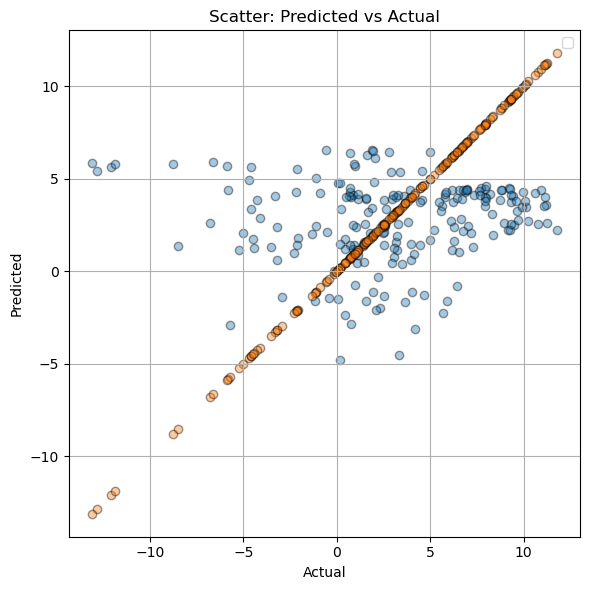

In [861]:


    
y_pred = model.predict(X_scaled_test)
y_pred = target_scaler.inverse_transform(y_pred)
y_true = target_scaler.inverse_transform(y_scaled_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_true))
print(f"✅ Overall RMSE: {rmse:.2f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.4, edgecolor='k')
plt.scatter(y_true, y_true, alpha=0.4, edgecolor='k')
#plt.plot([all_y_true.min(), all_y_true.max()],
         #[all_y_true.min(), all_y_true.max()], 'r--', label='Perfect Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


